# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Request Weather Data on each city in list cities
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
city_name = []
city_lat = []
city_temp = []
city_humidity = []
city_wind_speed = []
city_cloudiness = []

#Use try/except code to skip broken url's

for city in cities:
    try:
        query_url = base_url + city + "&appid=" + weather_api_key
        weather_response = requests.get(query_url).json()
        city_name.append(weather_response["name"])
        city_lat.append(weather_response["coord"]["lat"])
        city_temp.append(weather_response["main"]["temp"])
        city_humidity.append(weather_response["main"]["humidity"])
        city_wind_speed.append(weather_response["wind"]["speed"])
        city_cloudiness.append(weather_response["clouds"]["all"])
        print(f"Retrieving {city} weather data")
    except:
        print(f"City not found.  Skipping and going to next city.")
    pass

    



Retrieving pevek weather data
City not found.  Skipping and going to next city.
Retrieving saint anthony weather data
Retrieving padang weather data
Retrieving puerto ayora weather data
Retrieving rikitea weather data
Retrieving busselton weather data
Retrieving along weather data
Retrieving bluff weather data
Retrieving lagoa weather data
Retrieving albany weather data
City not found.  Skipping and going to next city.
Retrieving longyearbyen weather data
Retrieving hithadhoo weather data
Retrieving waddan weather data
Retrieving hamilton weather data
Retrieving atuona weather data
Retrieving yellowknife weather data
Retrieving kapaa weather data
Retrieving college weather data
Retrieving vardo weather data
Retrieving punta arenas weather data
Retrieving cape town weather data
Retrieving alofi weather data
Retrieving saint george weather data
City not found.  Skipping and going to next city.
Retrieving kavaratti weather data
Retrieving tucuman weather data
City not found.  Skipping and

Retrieving manadhoo weather data
Retrieving micheweni weather data
Retrieving sao joao da barra weather data
Retrieving limoges weather data
Retrieving ilulissat weather data
Retrieving najran weather data
City not found.  Skipping and going to next city.
Retrieving liuzhou weather data
City not found.  Skipping and going to next city.
Retrieving steamboat springs weather data
Retrieving bodinayakkanur weather data
Retrieving santa catarina de tepehuanes weather data
Retrieving vila velha weather data
City not found.  Skipping and going to next city.
Retrieving san policarpo weather data
Retrieving klaksvik weather data
Retrieving isangel weather data
Retrieving yarada weather data
Retrieving swinoujscie weather data
Retrieving santa cruz weather data
Retrieving yulara weather data
Retrieving cordoba weather data
Retrieving villa carlos paz weather data
Retrieving kananga weather data
Retrieving sola weather data
Retrieving buala weather data
Retrieving were ilu weather data
Retrieving

City not found.  Skipping and going to next city.
Retrieving trairi weather data
Retrieving kiruna weather data
Retrieving alleroy weather data
Retrieving esperance weather data
Retrieving kaeo weather data
Retrieving darhan weather data
Retrieving aksu weather data
Retrieving yarmouth weather data
Retrieving ussel weather data
Retrieving manggar weather data
Retrieving brighton weather data
Retrieving jilib weather data
Retrieving smithfield weather data
Retrieving northam weather data
Retrieving vanimo weather data
City not found.  Skipping and going to next city.
Retrieving kolondieba weather data
Retrieving cap malheureux weather data
Retrieving saint-pierre weather data
Retrieving kayes weather data
Retrieving khanapur weather data
Retrieving yanagawa weather data
Retrieving wajid weather data
Retrieving gayny weather data
Retrieving yar-sale weather data
Retrieving sabha weather data
City not found.  Skipping and going to next city.
Retrieving gazimurskiy zavod weather data
Retri

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert City Weather Data into Dictionary
city_dict = {
    "City Name": city_name,
    "Latitude": city_lat,
    "Temperature": city_temp,
    "Humidity": city_humidity,
    "Wind Speed": city_wind_speed,
    "Cloudiness": city_cloudiness
            }

In [5]:
#Convert City Dictionary into a Dataframe
city_df = pd.DataFrame(city_dict)
city_df.head()

,City Name,Latitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Pevek,69.70,263.41,93,5.78,55
1,Saint Anthony,45.02,266.04,61,4.10,75
2,Padang,-0.95,298.87,77,1.42,100
3,Puerto Ayora,-0.74,298.52,65,8.70,75
4,Rikitea,-23.12,297.94,72,3.17,7


In [7]:
#Save City Dataframe as a CSV File in output_data directory
city_df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Check for cities with Humidity over 100%
humid_check_df = city_df[city_df["Humidity"] > 100]
len(humid_check_df)

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

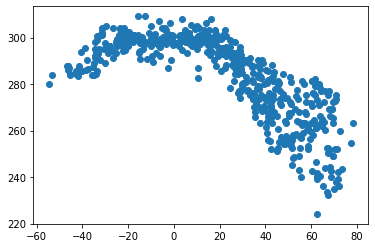

In [10]:
#Plot City Latitude vs. City Temperature and Save as PNG File
plt.scatter(city_df["Latitude"], city_df["Temperature"], marker = "o")
plt.savefig("output_data/latitude_temperature.png")
plt.show()

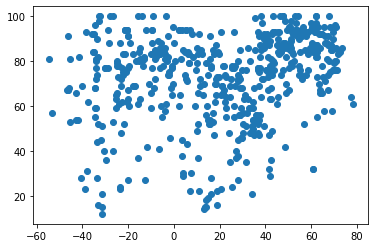

In [11]:
#Plot City Latitude vs. City Humidity and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o")
plt.savefig("output_data/latitude_humidity.png")
plt.show()

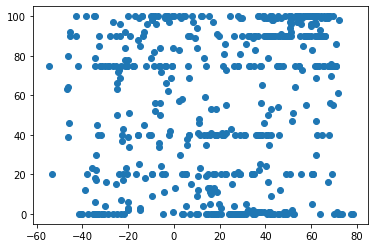

In [12]:
#Plot City Latitude vs. City Cloudiness and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o")
plt.savefig("output_data/latitude_cloudiness.png")
plt.show()

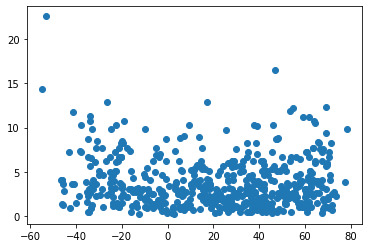

In [13]:
#Plot City Latitude vs. City Windspeed and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o")
plt.savefig("output_data/latitude_windspeed.png")
plt.show()

Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression